### Importing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Load the Dataset

In [2]:
try:
    df= pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the file path.")

Data loaded successfully.


## Data Inspection

In [3]:
# First 5 rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Streami

In [4]:
# Display all columns
print("All columns in the dataset:")
print(df.columns.tolist())

All columns in the dataset:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [5]:
# Display Summary of DataFrame
print("DataFrame Info: ")
print(df.info())

DataFrame Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 no

I discovered that the `TotalCharges` column is identified as **object data type**. This is incorrect as the column represents a numerical value. This issue is caused by the presence of a few empty strings within the column, which the Pandas interprets as non-numeric values, leading it to default the entire column to the object type to avoid data loss.

In [6]:
# Descriptive Statistics for Numerical Columns
print("Descriptive Statistics: ")
display(df.describe())

Descriptive Statistics: 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Key Findings
`tenure`: The average customer has a tenure of approximately 32 months. The data is widely distributed, ranging from new customers (min= 0) to long-term customers (max= 72 months). The median and mean are close, suggesting a fairly symmetrical distribution.

`MonthlyCharges`: The average monthly charge is $64.76, with a wide range from a minimum of $18.25 to a maximum of $118.75.

`SeniorCitizen`: The mean of this binary feature is 0.16, which indicates that about 16% of the customers in the dataset are senior citizens. This metric serves as a direct proportion for binary variables.

## Handling the `TotalCharges` Column

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') # error='coerce' will convert non-numeric values to NaN

# Check for missing values in TotalCharges
print("Missing values in TotalCharges after conversion:")
print(df['TotalCharges'].isnull().sum())

Missing values in TotalCharges after conversion:
11


Since there are very few missing values in the `TotalCharges` column, we can drop these rows.

In [8]:
df = df.dropna(subset=['TotalCharges'])
print("DataFrame shape after dropping missing TotalCharges:", df.shape)

DataFrame shape after dropping missing TotalCharges: (7032, 21)


## Analyzing the Target Variable (`Churn`)

In [9]:
# Convert the 'Churn' column to binary values
df['Churn']= df['Churn'].map({'Yes': 1, 'No': 0})

# Check the distribution of the Churn variable
print("Distribution of Churn variable:")
print(df['Churn'].value_counts())
print("\nPercentage of Churned Customers:")
print(df['Churn'].value_counts(normalize=True))


Distribution of Churn variable:
Churn
0    5163
1    1869
Name: count, dtype: int64

Percentage of Churned Customers:
Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64


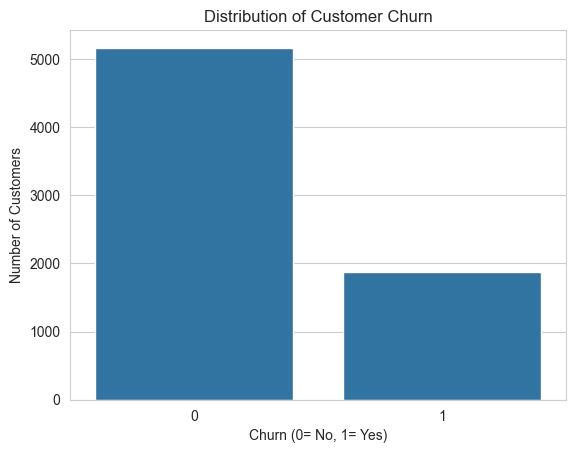

In [10]:
# Visualize the Distribution of the Churn variable
sns.set_style("whitegrid")
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Customer Churn')
plt.xlabel('Churn (0= No, 1= Yes)')
plt.ylabel('Number of Customers')
plt.show()

The analysis of the **target variable (`Churn`)** reveals a **significant class imbalance**.  
Most customers have **not churned (0)**, while only a smaller proportion have **churned (1)**.

---

### Why This Matters?
- Machine learning models trained on imbalanced data may become **biased towards the majority class (here 0)**.  
- This can result in a **misleadingly high accuracy**, while the model fails to correctly identify the customers who are most likely to churn.

--- 


## Categorical Features vs. `Churn`

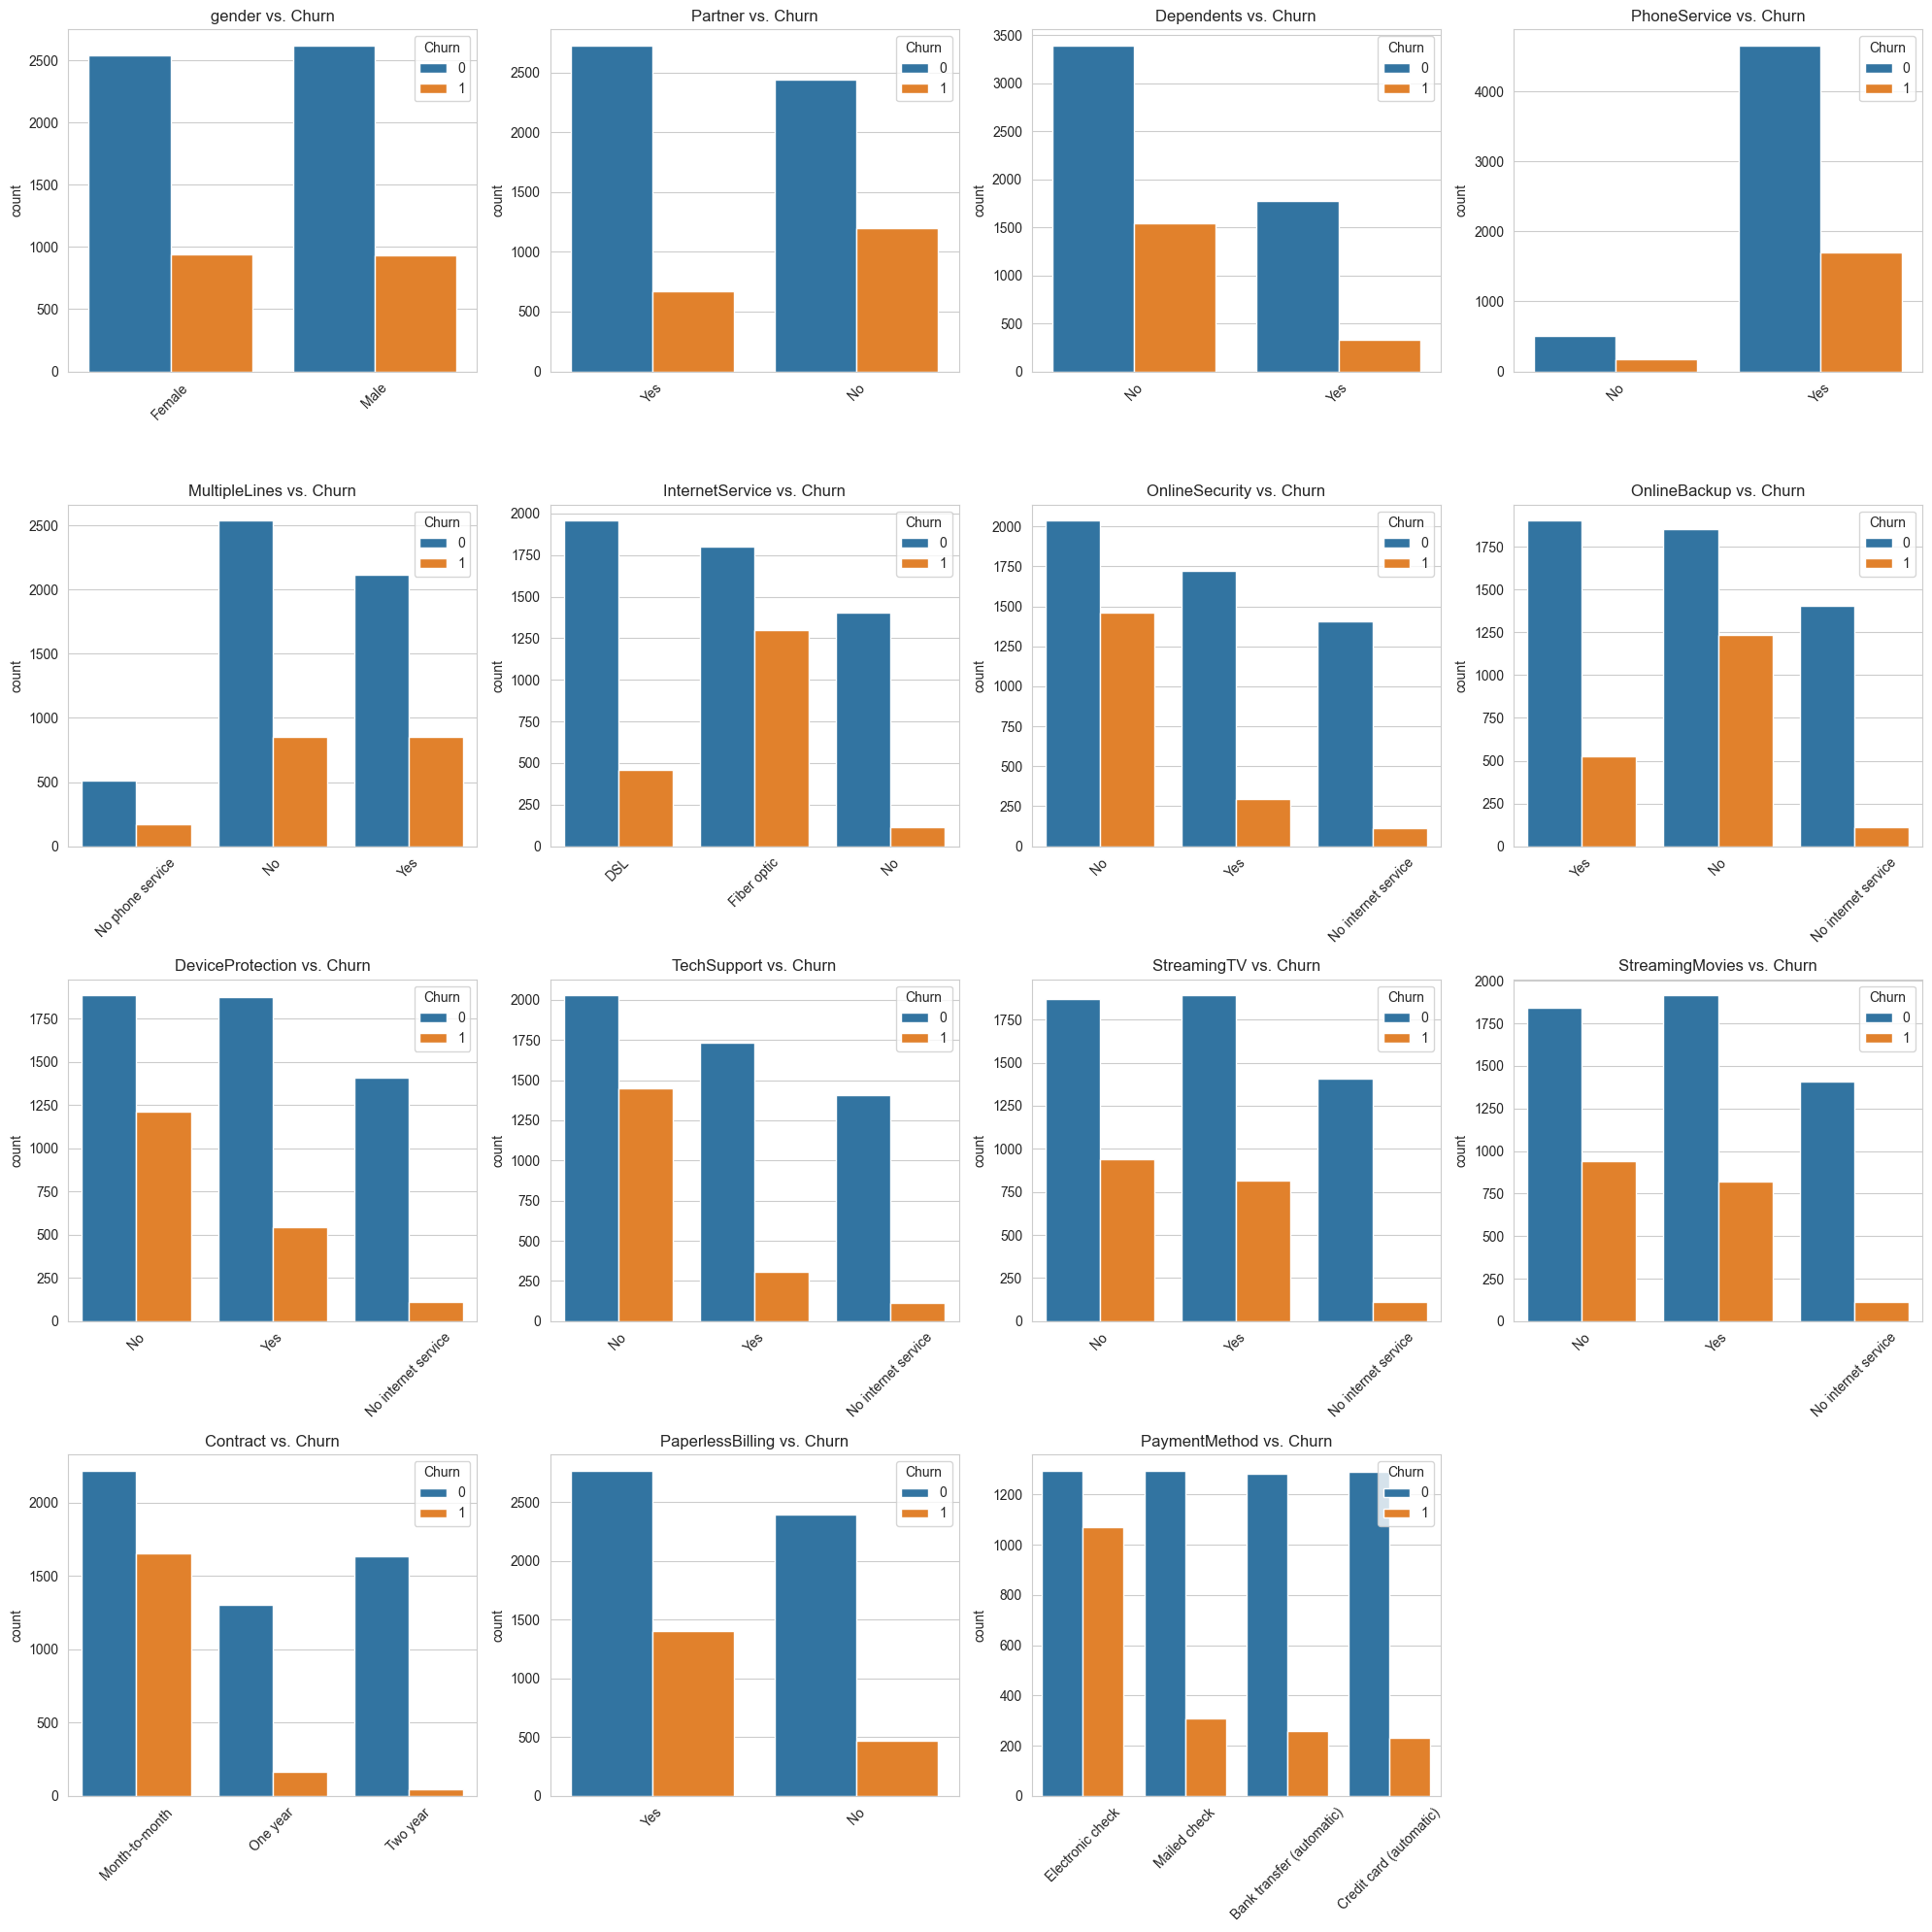

In [11]:
# List of all Categorical values
categorical_features= df.select_dtypes(include=['object']).columns.drop('customerID').tolist()
nrows= math.ceil(len(categorical_features)/4)

# Plot the Categorical Features vs. Churn
fig, axes= plt.subplots(nrows=nrows, ncols=4, figsize=(20, 20))
axes= axes.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(x=col, hue='Churn', data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs. Churn')
    axes[i].tick_params(axis='x', rotation=45   )
    axes[i].set_xlabel('')

if len(categorical_features)<len(axes):
    for i in range(len(categorical_features), len(axes)):
        fig.delaxes(axes[i])
        
plt.tight_layout()
plt.show()

### Key Observations
- **Contract Type**: Customers with **month-to-month contracts** show a much higher churn rate compared to those with one- or two-year contracts.  
- **Internet Service**: Customers with **fiber optic service** appear more likely to churn than those with DSL or no internet service.  
- **Online Security & Tech Support**: Lack of these services is strongly associated with higher churn.  
- **Payment Method**: Customers using **electronic check** have the highest churn rate compared to other payment methods.  
- **Paperless Billing**: Customers with paperless billing show a higher tendency to churn.  

---

These insights highlight potential **risk factors** for churn and suggest areas where retention strategies (e.g., promotions for long-term contracts, bundling online security services) could be most effective.


## Numerical Features vs. `Churn`

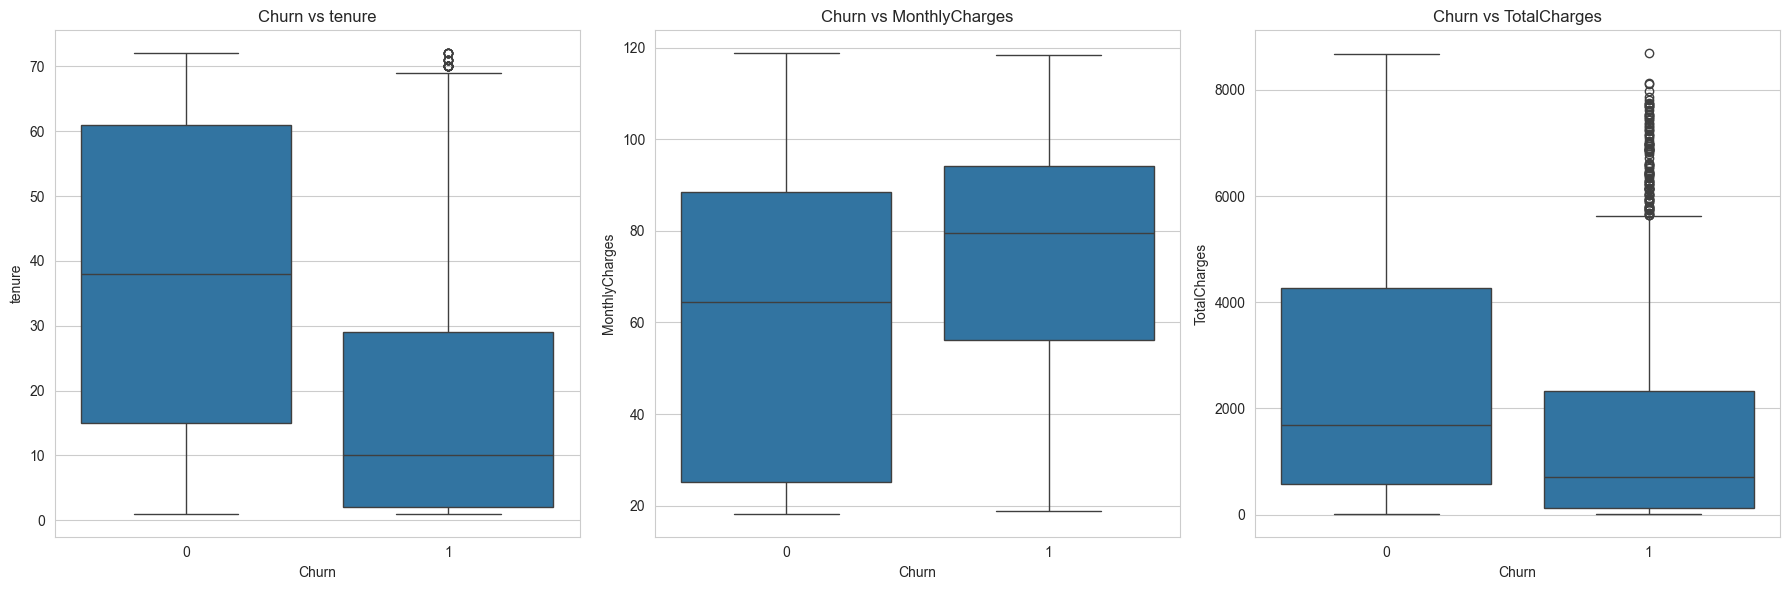

In [12]:
# Get the Numerical Features
numerical_features= ['tenure', 'MonthlyCharges', 'TotalCharges']

# Plot the Box-Plot for Numerical Features vs. Churn
fig, axes= plt.subplots(nrows=1, ncols=3, figsize=(18,6))
for i, col in enumerate(numerical_features):
    sns.boxplot(x='Churn', y=col, data=df, ax= axes[i])
    axes[i].set_title(f'Churn vs {col}') 

plt.tight_layout()
plt.show()

### Key Observations
- **Tenure**: Customers who churn generally have **much shorter tenure** compared to those who stay, indicating that churn often occurs early in the customer lifecycle.  
- **Monthly Charges**: Customers with higher **monthly charges** are more likely to churn, suggesting sensitivity to higher bills.  
- **Total Charges**: Customers who did not churn accumulated **higher total charges**, which aligns with their longer tenure.  

These patterns highlight that **contract length and pricing** play critical roles in churn behavior.


## Correaltion Analysis

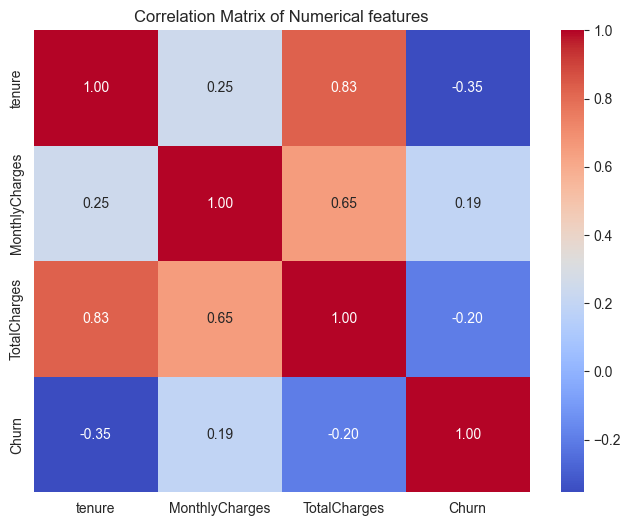

In [13]:
# Get the Numerical features along with target variable
numerical_df= df[numerical_features+ ['Churn']]
corr_matrix= numerical_df.corr()

# Plot the Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical features')
plt.show()

### Key Observations
- **Tenure vs. Churn**: Strong **negative correlation** (≈ -0.35). Customers with longer tenure are less likely to churn.  
- **MonthlyCharges vs. Churn**: Weak **positive correlation** (≈ +0.19). Higher monthly bills are slightly associated with higher churn.  
- **TotalCharges vs. Churn**: Weak **negative correlation** (≈ -0.20), since lower total charges typically indicate newer customers who are more likely to churn.  
- **Tenure vs. TotalCharges**: Very strong **positive correlation** (≈ +0.83), as expected because total charges increase with time.  

This correlation analysis supports earlier findings: **contract duration and pricing strategies** are major churn drivers.


## Save the Semi-Cleaned Data

In [14]:
# Saving the Semi-Cleaned Data
df.to_csv('../data/semi_cleaned.csv', index=False)
print("Semi-Cleaned data saved to '../data/semi_cleaned.csv'")

Semi-Cleaned data saved to '../data/semi_cleaned.csv'
